In [1]:
# importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
Insurance = pd.read_csv(r"C:\Users\Vaibhav\Desktop\ML Project\Porject 1\insurance.csv")

In [3]:
# To get first 5 rows data 
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# to check column wise information
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# To check the Row & Columns
Insurance.shape

(1338, 7)

In [6]:
# To seperate Numirical data & String data
cat_col = Insurance.select_dtypes(include=['object']).columns
cat_num = Insurance.select_dtypes(exclude=['object']).columns
Insurance_cat = Insurance[cat_col]
Insurance_num = Insurance[cat_num]
#print(Insurance_cat)
#print(Insurance_num)


In [7]:
# To check whether data has null value
Insurance.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [8]:
# To sort the data by age column
Insurance.sort_values(by=['age'], ascending = False, ignore_index = True)

,age,sex,bmi,children,smoker,region,charges
0,64,male,34.500,0,no,southwest,13822.80300
1,64,female,39.050,3,no,southeast,16085.12750
2,64,male,37.905,0,no,northwest,14210.53595
3,64,male,23.760,0,yes,southeast,26926.51440
4,64,male,40.480,0,no,southeast,13831.11520
...,...,...,...,...,...,...,...
1333,18,female,40.185,0,no,northeast,2217.46915
1334,18,female,38.665,2,no,northeast,3393.35635
1335,18,male,22.990,0,no,northeast,1704.56810
1336,18,female,35.625,0,no,northeast,2211.13075


Text(0.5, 0, 'continuous Variable')

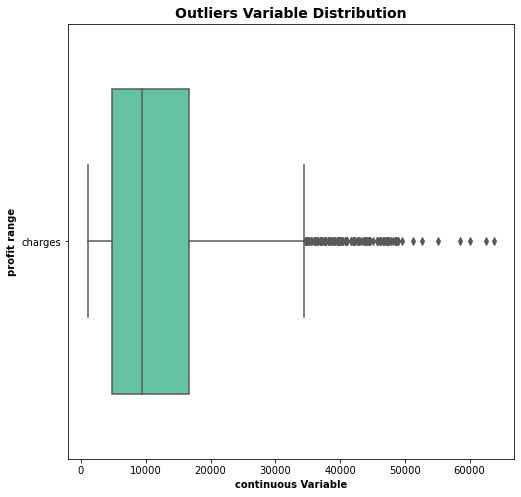

In [9]:
# To check the outliers of charges column from the dataframe
outliers = ['charges']
plt.rcParams ['figure.figsize'] = [8,8]
sns.boxplot(data= Insurance[outliers], orient = "h", palette= "Set2" , whis = 1.5, saturation=100 , width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14 , fontweight = 'bold')
plt.ylabel("profit range", fontweight = 'bold')
plt.xlabel("continuous Variable", fontweight = 'bold')


In [10]:
charges_std_dev = np.std(Insurance['charges'])

In [11]:
print(charges_std_dev)

12105.484975561605


In [12]:
Insurance.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [13]:
#Insurance.charges.Quantile([0.25,0.5,0.75])
np.percentile(Insurance.charges, [0.25, 0.5, 0.75])

array([1136.608873 , 1145.1108775, 1241.5841125])

In [14]:
# To check the Inter Quantile values & verify the outliers 
q1 = Insurance['charges'].quantile(0.25)
q3 = Insurance['charges'].quantile(0.75)
iqr = q3 - q1
Insurance_outliers_sum = ((Insurance['charges'] < (q1 - 1.5 * iqr)) | (Insurance['charges'] > (q3 + 1.5 * iqr))).sum()


In [15]:
print(iqr)

11899.625365


In [16]:
print(Insurance_outliers_sum)

139


### So there are 139 outliers values, which represents about 10% of all population. 
### The decision is to not remove them because they are not so discrepant from the average values and
### they probably are a natual part of the population we are studying.


In [17]:
# To check the duplicate value from dataframe
Insurance[Insurance.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
# To drop the duplicated record
Insurance.drop(581)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


C:\Users\Vaibhav\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:236: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
C:\Users\Vaibhav\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


Text(0, 0.5, 'Count')

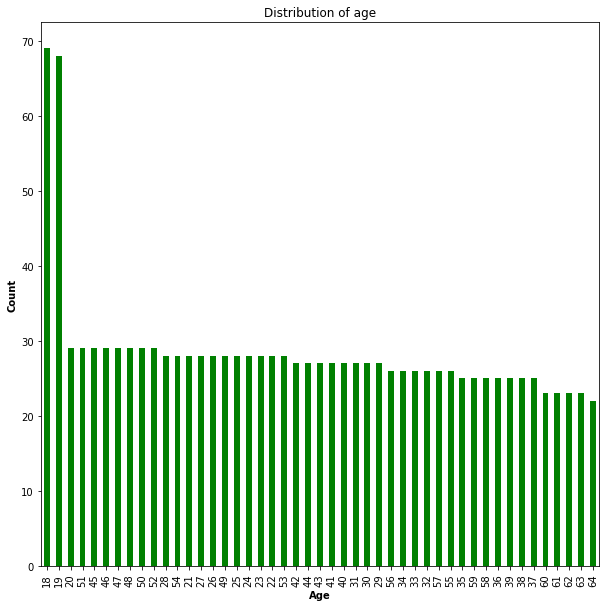

In [19]:
# To check the age distibution
plt.rcParams ['figure.figsize'] = [10,10]
ax = Insurance['age'].value_counts().plot (kind = 'bar', stacked = True, colormap = 'Set1', color = 'green')
ax.title.set_text('Distribution of age')
plt.xlabel ('Age' , fontweight = 'bold')
plt.ylabel ('Count' , fontweight = 'bold')


The proportion of 18 and 19 years old people is almost the double of the other ages;
Except by the ages of 18 and 19, the proportion of ages is very regular.

Text(0, 0.5, 'Count')

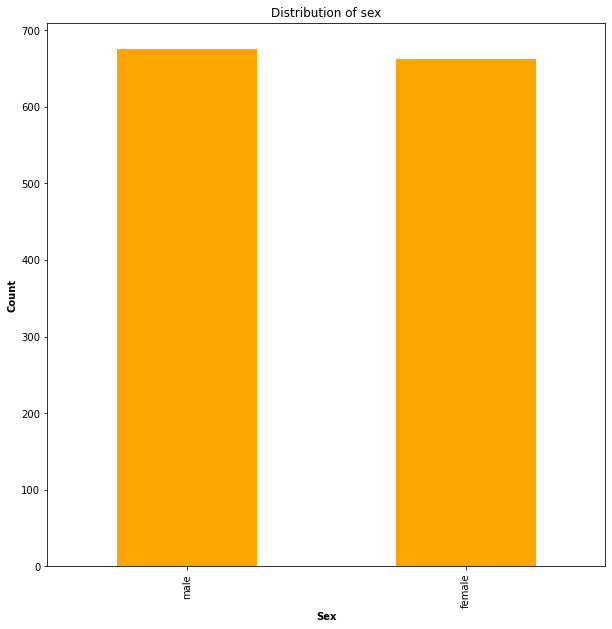

In [20]:
# To check the asex distibution
plt.rcParams ['figure.figsize'] = [10,10]
ax = Insurance['sex'].value_counts().plot (kind = 'bar', stacked = True, colormap = 'Set1', color = 'orange')
ax.title.set_text('Distribution of sex')
plt.xlabel ('Sex' , fontweight = 'bold')
plt.ylabel ('Count' , fontweight = 'bold')

There is almost the same number of males and females people

Text(0, 0.5, 'Count')

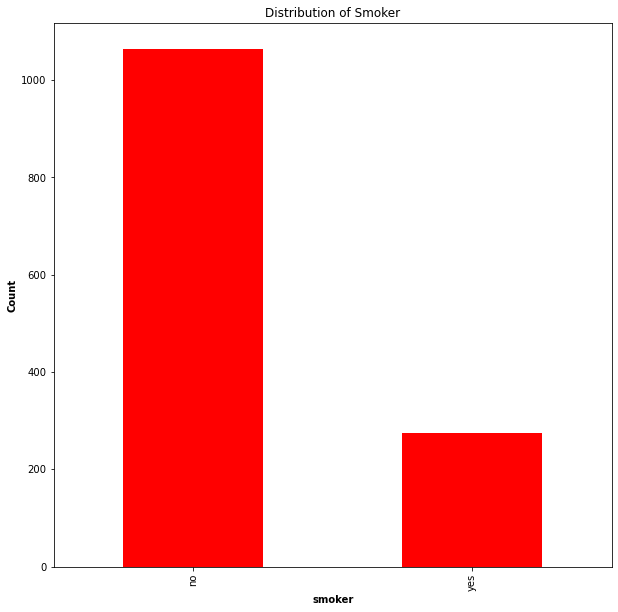

In [21]:
# To check the smoker distibution
plt.rcParams ['figure.figsize'] = [10,10]
ax = Insurance['smoker'].value_counts().plot (kind = 'bar', stacked = True, colormap = 'Set1', color = 'red')
ax.title.set_text('Distribution of Smoker')
plt.xlabel ('smoker' , fontweight = 'bold')
plt.ylabel ('Count' , fontweight = 'bold')

Most of the people don't smoke

C:\Users\Vaibhav\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'BMI Distribution'}, xlabel='bmi', ylabel='Density'>

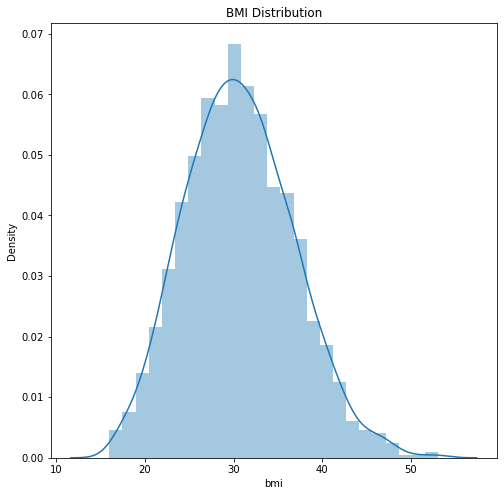

In [22]:
# Visualizing the distribution of bmi
plt.figure(figsize=(8,8))

plt.title('BMI Distribution')
sns.distplot(Insurance['bmi'])

This curve is very similar to a normal distribution and very simetric also;
The mean of this bmi population seems to be around 30.

C:\Users\Vaibhav\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:236: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
C:\Users\Vaibhav\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:124: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


Text(0, 0.5, 'Count')

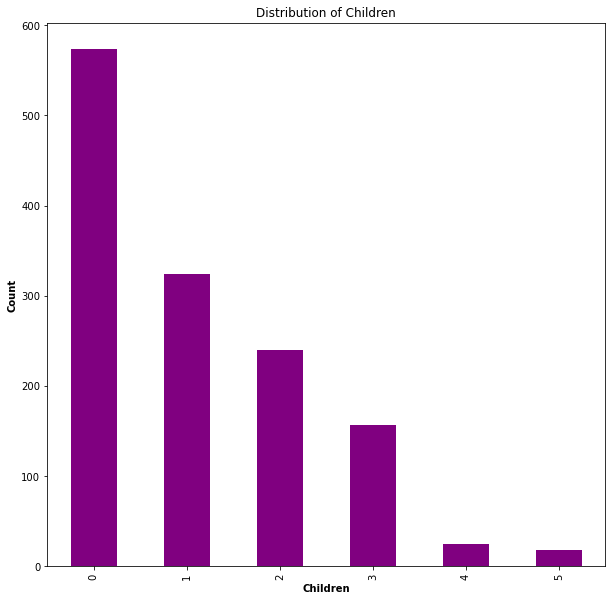

In [23]:
# To check the childern distibution
plt.rcParams ['figure.figsize'] = [10,10]
ax = Insurance['children'].value_counts().plot (kind = 'bar', stacked = True, colormap = 'Set1', color = 'purple')
ax.title.set_text('Distribution of Children')
plt.xlabel ('Children' , fontweight = 'bold')
plt.ylabel ('Count' , fontweight = 'bold')


Most of the people doesn't have children

Text(0, 0.5, 'Count')

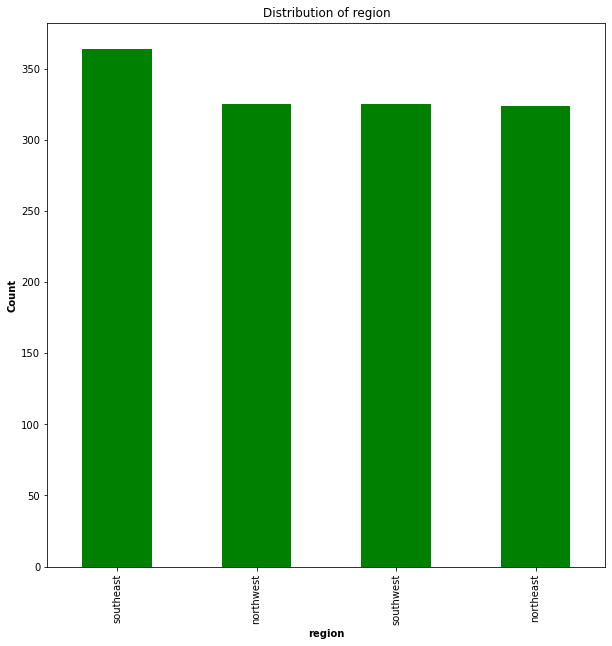

In [24]:
# To check the region distibution
plt.rcParams ['figure.figsize'] = [10,10]
ax = Insurance['region'].value_counts().plot (kind = 'bar', stacked = True, colormap = 'Set1', color = 'green')
ax.title.set_text('Distribution of region')
plt.xlabel ('region' , fontweight = 'bold')
plt.ylabel ('Count' , fontweight = 'bold')

It seems very regular the distribution of the regions where the people live

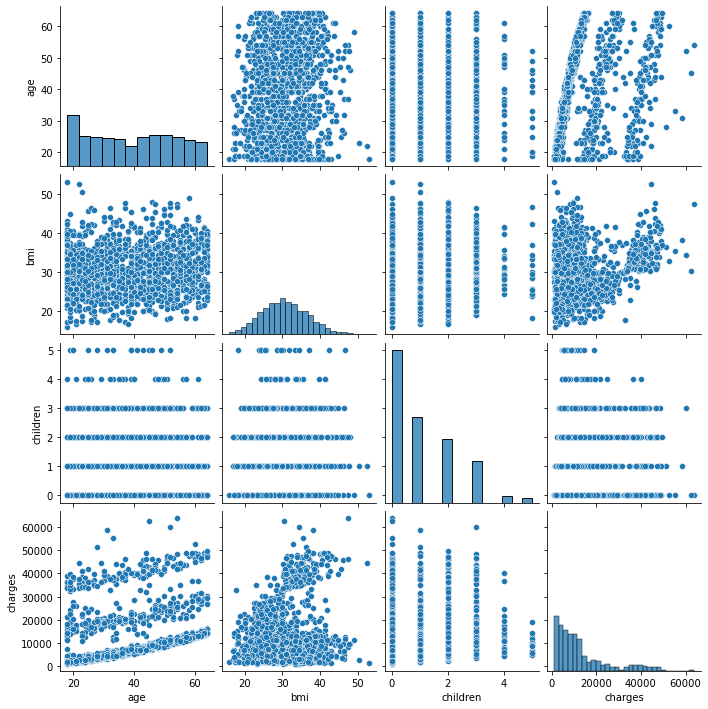

In [25]:
dist = sns.pairplot(Insurance[cat_num])
# sns.pairplot(Insurance, vars = Insurance.columns[:-1])

*The number of children seems to have poor correlation with the medical costs;


*The age of the person and its BMI have little correlation.

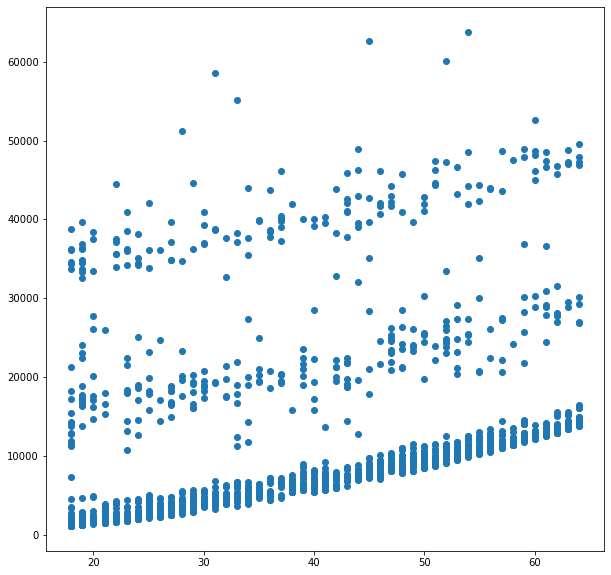

In [26]:
plt.scatter(Insurance['age'], Insurance['charges'])
plt.show()


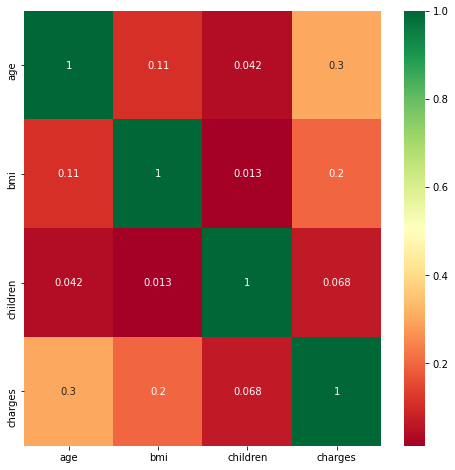

In [27]:
plt.figure(figsize = (8,8))
sns.heatmap(Insurance.corr(), cmap = 'RdYlGn', annot = True)
plt.show()

In [28]:
# To coresscheck the insights which we got from heatmap calculating the factorization 
Insurance_corr = Insurance.copy()
Insurance_corr['sex'] = pd.factorize(Insurance_corr['sex'])[0] + 1
Insurance_corr['region'] = pd.factorize(Insurance_corr['region'])[0] + 1
Insurance_corr['smoker'] = pd.factorize(Insurance_corr['smoker'])[0] + 1
corr = Insurance_corr.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

As we observe, the number of children, sex and region has poor correlation, so they will be dropped from the model;

The smoker column has a strong inverse correlation with the medical costs.

In [29]:
# To drop the poor correlated columns
Insurance = Insurance.drop(['children', 'sex', 'region'], axis = 1)

In [30]:
print(Insurance)

      age     bmi smoker      charges
0      19  27.900    yes  16884.92400
1      18  33.770     no   1725.55230
2      28  33.000     no   4449.46200
3      33  22.705     no  21984.47061
4      32  28.880     no   3866.85520
...   ...     ...    ...          ...
1333   50  30.970     no  10600.54830
1334   18  31.920     no   2205.98080
1335   18  36.850     no   1629.83350
1336   21  25.800     no   2007.94500
1337   61  29.070    yes  29141.36030

[1338 rows x 4 columns]


In [31]:
# To change the catogorical data into numric
Insurance['smoker']= pd.factorize(Insurance['smoker'])[0]
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   bmi      1338 non-null   float64
 2   smoker   1338 non-null   int64  
 3   charges  1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [32]:
# To seperate the Dependent & Independednt variable
y = Insurance.loc[:,['charges']].values
x = Insurance.drop(columns = ['charges'])

In [33]:
# To split the dataframe into training & testing
X_train, x_test, Y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 0)

In [34]:
# To normalize independant variables
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
x_test_scaled= scaler.transform(x_test)

In [35]:
# To predict the accuricy using linear regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(x_test)
r2_score(y_pred, y_test)

0.722033135579031

In [36]:
# To predict the accuricy using RandomForest regression model
regressor_forest =  RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_forest.fit(X_train, Y_train)
y_pred = regressor_forest.predict(x_test)
r2_score(y_pred, y_test)

<ipython-input-36-aaad75d96181>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_forest.fit(X_train, Y_train)


0.8406129559220633

In [37]:
regressor.coef_

array([[   257.04066602,    321.83997719, -23625.23448834]])

In [38]:
regressor.intercept_

array([12053.3264715])

Creating a label to show the equations:

x1  = Age

x2  = BMI

d  = Boolean variable to represent if the person is a smoker (inverted the signal to be more readable)

y  = Charges

So, the equation is:

y=12053.33+257.04x1+321.84x2+23625.23d

## Final Insights
The Random Forest Model was more accurate
As expected, smokers have more medical costs